# Devinons l'humeur d'une musique

L'objectif de ce projet est de pouvoir automatiquement déterminer si une musique est triste ou bien joyeuse. Pour cela nous allons utiliser la librairie [librosa](https://librosa.org/doc/latest/index.html). Cette dernière nous permettra de visualiser et d'obtenir des informations sur les musiques.
Nous avons téléchargé 10 musiques "tristes" et 10 musiques "joyeuses". Elles sont placées dans le dossier ./data/musics/ et commence par a pour les musiques joyeuses et b pour les musiques tristes.

In [38]:
%load_ext autoreload
%autoreload 2
data_dir = "./data/"
from utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import librosa # for working with audio in python
import librosa.display # for waveplots, spectograms, etc
import soundfile as sf # for accessing file information
import IPython.display as ipd # for playing files within python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Chargement des données et prise en main de librosa
Notre première étape va être de charger les données et d'extraire des informations avec la librairie audio librosa.

In [40]:
musics = ls("./data/musics")
for music in musics:
    info = sf.info("./data/musics/" + music)
    print(info)

./data/musics/a01.wav
samplerate: 44100 Hz
channels: 2
duration: 03:51.410 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a02.wav
samplerate: 44100 Hz
channels: 2
duration: 03:22.524 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a03.wav
samplerate: 44100 Hz
channels: 2
duration: 04:8.848 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a04.wav
samplerate: 44100 Hz
channels: 2
duration: 04:26.774 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a05.wav
samplerate: 44100 Hz
channels: 2
duration: 03:17.741 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a06.wav
samplerate: 44100 Hz
channels: 2
duration: 02:46.348 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a07.wav
samplerate: 44100 Hz
channels: 2
duration: 03:48.252 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit

In [41]:
musics = ls("./data/musics")
y,sr = librosa.load("./data/musics/" + musics[10], offset=15, duration=3)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
#df = pd.DataFrame(y, columns=['Amplitude'])
#df.index = [(1/sr)*i for i in range(len(df.index))]
tempo # regardons à quoi ça ressemble

112.34714673913044

In [42]:
musics = load_musics(data_dir + "musics/")
print("done")

done


# Affichons nos données
Nous allons maintenant visualiser nos données. Peut-être que ça nous donnera des idées de features.

# Testons nos features
Nous allons maintenant tester les features que nous avons implémentés et regarder si elles nous donnent des résultats cohérents.

In [43]:
df = pd.DataFrame({
	'amplitude' : musics.apply(mean_amplitude),
    'spectral_centroid' : musics.apply(spectral_centroid_median),
	'classe': musics.index.map(lambda name: 1 if name[0] == 'a' else -1),
})

In [44]:
dfstd = ((df-df.min())/(df.max()-df.min())-0.5)*4
dfstd["classe"] = df["classe"]
dfstd.style.background_gradient(cmap='RdYlBu_r')

,amplitude,spectral_centroid,classe
a01.wav,1.082569,1.233428,1
a02.wav,0.225645,2.000000,1
a03.wav,1.308591,1.132006,1
a04.wav,1.316692,0.658212,1
a05.wav,1.398828,1.889604,1
a06.wav,-2.000000,1.934716,1
a07.wav,1.130526,0.778970,1
a08.wav,1.274433,1.061887,1
a09.wav,-1.558577,1.071043,1
a10.wav,1.231710,0.459104,1


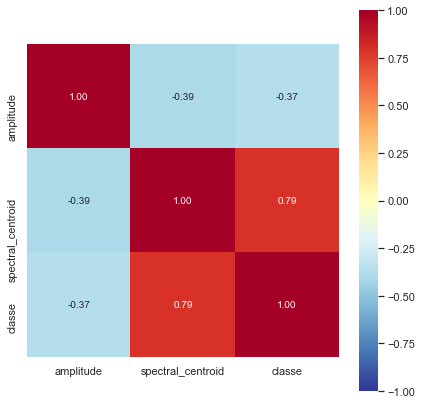

In [45]:
fig = Figure(figsize=(7,7))
sns.heatmap(dfstd.corr(), fmt='0.2f', annot=True, square=True, cmap='RdYlBu_r', vmin=-1, vmax=1, ax=fig.add_subplot())
fig

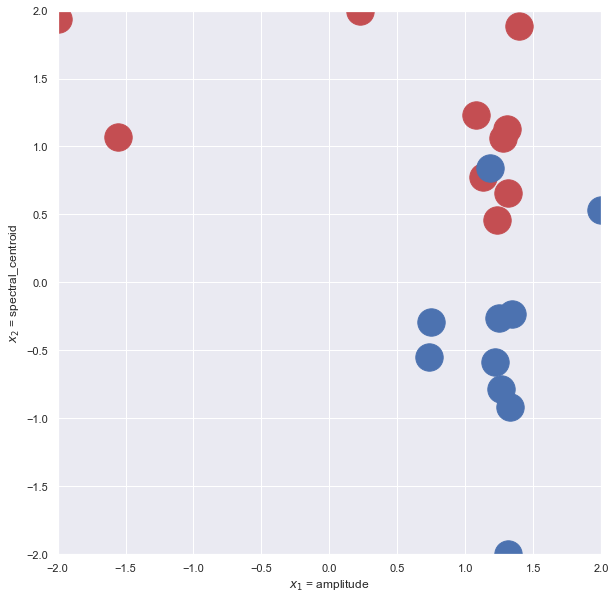

In [46]:
make_scatter_plot2(dfstd, axis='square')

# Hello

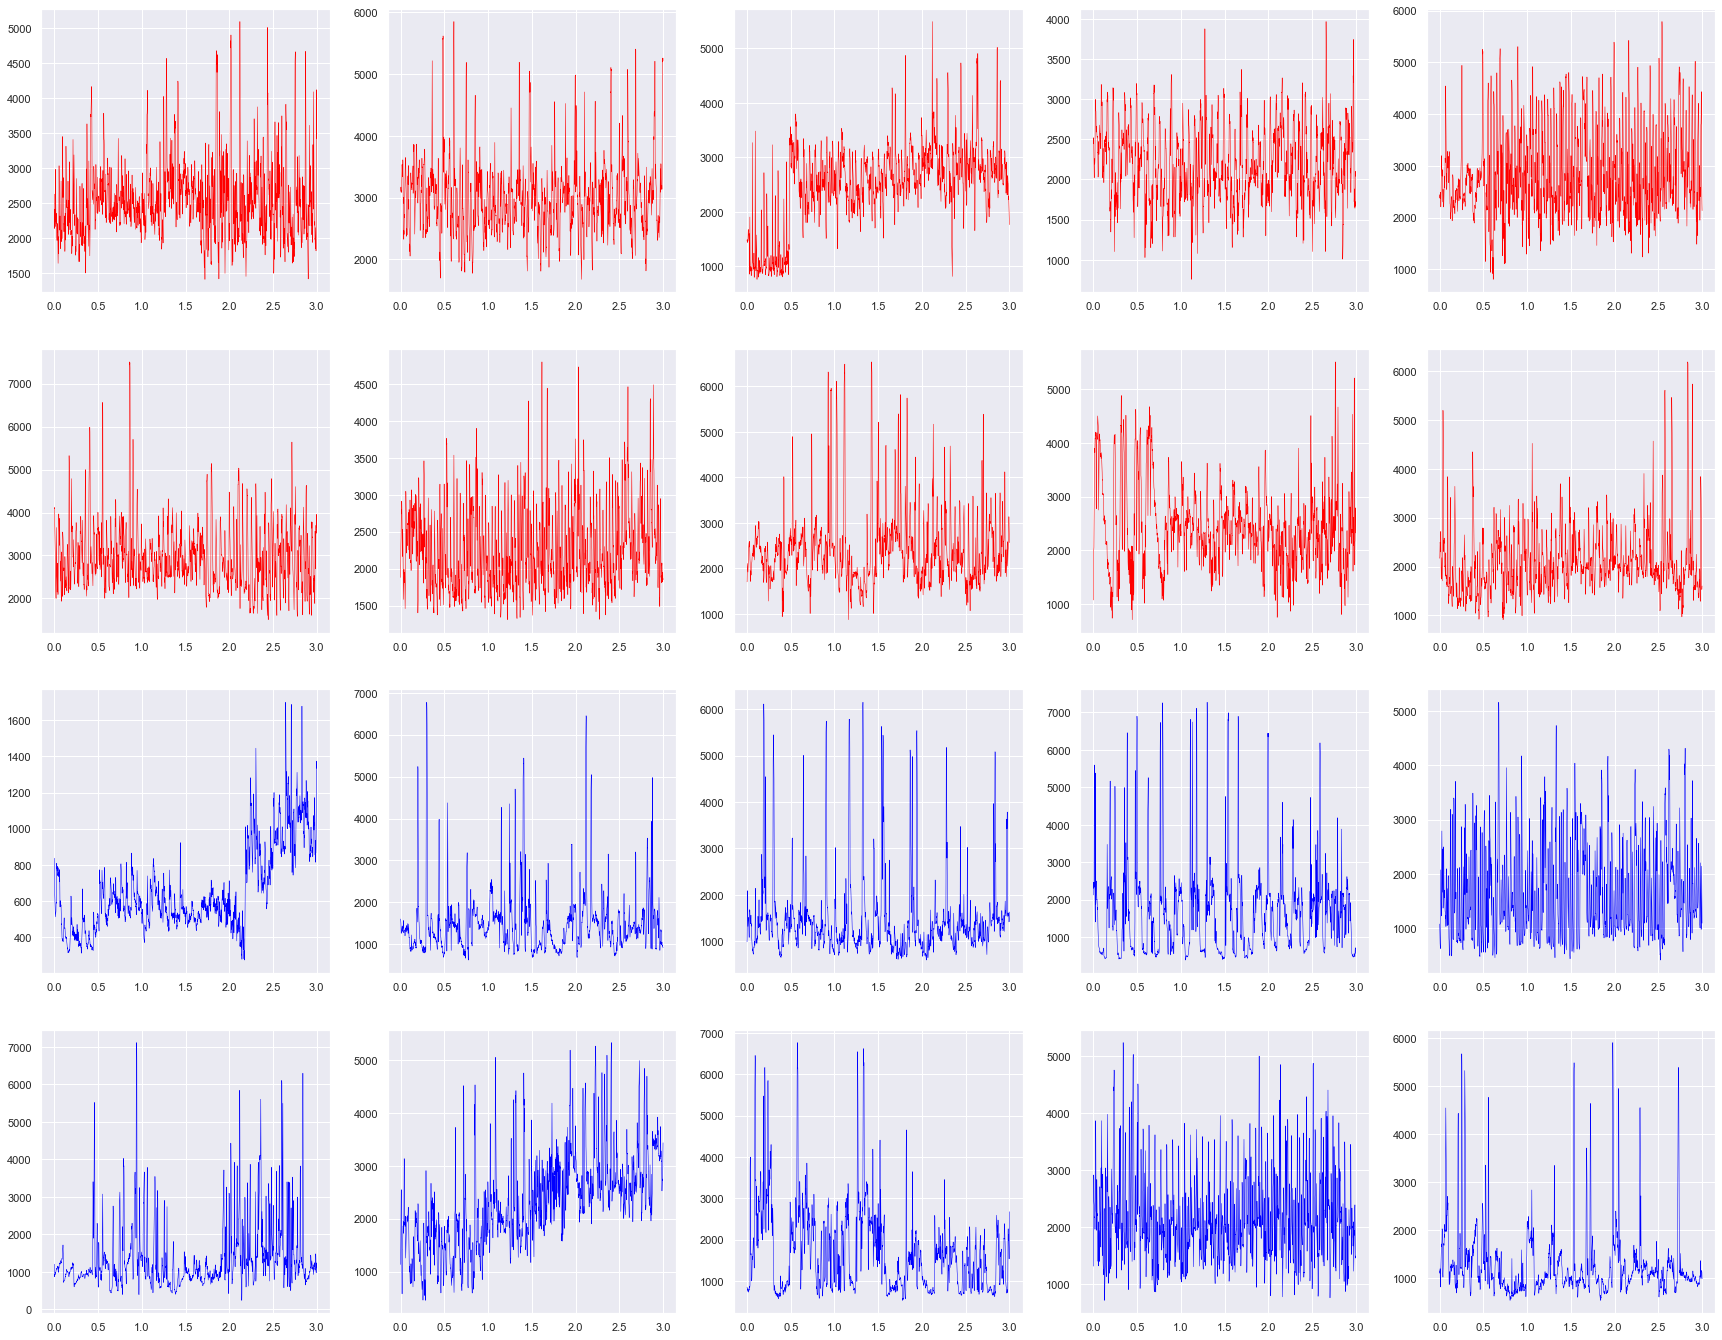

In [47]:
plt_compare2(musics, spect_cent)

In [ ]:
plt_compare2(musics, lambda music : music[0])

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax_P = fig.add_subplot(1, 2, 1)
plt_compare(musics, mean_amplitude, ax_P)
ax_Q = fig.add_subplot(1, 2, 2)
plt_compare(musics, spectral_centroid, ax_Q)